In [2]:
using HomotopyContinuation, DynamicPolynomials
using Plots

In [3]:
#generates a random number between -n and n
function genrand(n)
    return rand()*n*2 - n
end

@polyvar x y
#creates a random polynomial with coeffcients between -n and n
function get_random_polynomial(n)
    p = MultivariatePolynomials.polynomial([genrand(n), genrand(n), genrand(n), genrand(n), genrand(n), genrand(n)], [x^2, x, x*y, y, y^2, 1])
    return p
end

#takes the norm of a polynomial by squarring the coefficients
function get_norm(p)
    normop = norm(MultivariatePolynomials.coefficients(p, [x^2, x, x*y, y, y^2, 1]))
    return normop
end

get_norm (generic function with 1 method)

### The function below just uses the minimise function with a1=1 and then a2=1 and then outputs the best result

In [4]:
function just_minimisebis(p)    
    
    c = MultivariatePolynomials.coefficients(p, [x^2, x, x*y, y, y^2, 1])
    
    #for a1 = 1
    @var a1 a2 a3 b1 b2 b3
    f1 = (c[1] - b1)^2 + (c[2] - b3 - a3*b1)^2 + (c[3] - b2 - a2*b1)^2 + (c[4] - a2*b3 - a3*b2)^2 + (c[5] - a2*b2)^2 + (c[6] - a3*b3)^2
    
    #get the gradient
    J1 = differentiate(f1, [a2,a3,b1,b2,b3])
    system1 = System(J1; variables = [a2,a3,b1,b2,b3])

    result1 = solve(system1; show_progress= false)

    real_sols1 = real_solutions(result1; tol=1e-5)
    
    
    #for a2 = 1
    f2 = (c[1] - a1*b1)^2 + (c[2] - a1*b3 - a3*b1)^2 + (c[3] - a1*b2 - b1)^2 + (c[4] - b3 - a3*b2)^2 + (c[5] - b2)^2 + (c[6] - a3*b3)^2
    
    #get the gradient
    J2 = differentiate(f2, [a1,a3,b1,b2,b3])
    system2 = System(J2; variables = [a1,a3,b1,b2,b3])

    result2 = solve(system2; show_progress= false)

    real_sols2 = real_solutions(result2; tol=1e-5)
    
    #checks if we have any solution
    sol=[true,true]
    if real_sols1 == []
        sol[1] = false
    end
    if real_sols2 == []
        sol[2] = false
    end
    if ! sol[1] && ! sol[2]
        return false,0
    end
    
    
    function mf1(v)
        a2, a3, b1, b2, b3 = v
        return (c[1] - b1)^2 + (c[2] - b3 - a3*b1)^2 + (c[3] - b2 - a2*b1)^2 + (c[4] - a2*b3 - a3*b2)^2 + (c[5] - a2*b2)^2 + (c[6] - a3*b3)^2
    end
    
    function mf2(v)
        a1, a3, b1, b2, b3 = v
        return (c[1] - a1*b1)^2 + (c[2] - a1*b3 - a3*b1)^2 + (c[3] - a1*b2 - b1)^2 + (c[4] - b3 - a3*b2)^2 + (c[5] - b2)^2 + (c[6] - a3*b3)^2
    end
    
    if sol[1]
        minval1, minindex1 = findmin(map(s -> mf1(s[1:5]), real_sols1))
        minarg1 = real_sols1[minindex1][1:5]
    end
    if sol[2]
        minval2, minindex2 = findmin(map(t -> mf2(t[1:5]), real_sols2))
        minarg2 = real_sols2[minindex2][1:5]
    end
    
    #find the minimum value for the best solution
    if sol[1] && sol[2]
        if minval1 < minval2
            sol[2] = false
        end
        sol[1] = false
    end
    
    if sol[1]
        alpha = (x + minarg1[1] * y + minarg1[2])
        beta = (minarg1[3] * x + minarg1[4] * y + minarg1[5])
        return alpha, beta
    end
        
    alpha = (minarg2[1]*x + y + minarg2[2])
    beta = (minarg2[3] * x + minarg2[4] * y + minarg2[5])
    return alpha, beta
end

just_minimisebis (generic function with 1 method)

Tried a function where we set a1=0 but it does not find a real solution.

### The function below just uses the minimise function with a1=1

In [5]:
function just_minimise(p)    
    
    c = MultivariatePolynomials.coefficients(p, [x^2, x, x*y, y, y^2, 1])
    
    #for a1 = 1
    @var a1 a2 a3 b1 b2 b3
    f = (c[1] - b1)^2 + (c[2] - b3 - a3*b1)^2 + (c[3] - b2 - a2*b1)^2 + (c[4] - a2*b3 - a3*b2)^2 + (c[5] - a2*b2)^2 + (c[6] - a3*b3)^2
    
    #get the gradient
    J = differentiate(f, [a2,a3,b1,b2,b3])
    system = System(J; variables = [a2,a3,b1,b2,b3])

    result = solve(system; show_progress= false)

    real_sols = real_solutions(result; tol=1e-5)
    
    #checks if we have any solution
    if real_sols == []
        return false,0
    end
    
    
    function mf(v)
        a2, a3, b1, b2, b3 = v
        return (c[1] - b1)^2 + (c[2] - b3 - a3*b1)^2 + (c[3] - b2 - a2*b1)^2 + (c[4] - a2*b3 - a3*b2)^2 + (c[5] - a2*b2)^2 + (c[6] - a3*b3)^2
    end
    
    #find the best solution and return it
    minval, minindex = findmin(map(s -> mf(s[1:5]), real_sols))
    minarg = real_sols[minindex][1:5]
    
    alpha = (x + minarg[1] * y + minarg[2])
    beta = (minarg[3] * x + minarg[4] * y + minarg[5])
    return alpha, beta
end

just_minimise (generic function with 1 method)

In [8]:
@polyvar x y
loops = 20
averagetime1 = 0
averagenorm1 = 0
stopped = [0,0]
for _ in 1:loops
    print("+")
    p = get_random_polynomial(1000)
    t = time()
    for _ in 1:20
        a,b=just_minimise(p)
        if a == false
            stopped[1] += 1
            break
        end
        p = p - (a*b)  
    end
    averagetime1 += time() - t
    polnorm = get_norm(p)
    averagenorm1 += polnorm
end
averagetime1 = averagetime1/loops
averagenorm1 = averagenorm1/loops

averagetime2 = 0
averagenorm2 = 0
for _ in 1:loops
    print("+")
    c = get_random_polynomial(1000)
    t = time()
    for _ in 1:loops
        a,b=just_minimisebis(c)
        if a == false
            stopped[2] += 1
            break
        end
        c = c - (a*b)  
    end
    averagetime2 += time() - t
    opolnorm = get_norm(c)
    averagenorm2 += opolnorm
end
averagetime2 = averagetime2/loops
averagenorm2 = averagenorm2/loops

println("In ",loops, " iterations...")
println("Using a1=1: ")
println("Time: ", averagetime1,"s", " - Norm: ", averagenorm1)
println("Using a1=1 or a2=1: ")
println("Time: ", averagetime2,"s", " - Norm: ", averagenorm2)
println(stopped)
#the [11,1] is the number each of them respectively stopped because it was lower than threshold

++++++++++++++++++++++++++++++++++++++++In 20 iterations...
Using a1=1: 
Time: 1.5363895297050476s - Norm: 23.768750055082734
Using a1=1 or a2=1: 
Time: 3.282604193687439s - Norm: 0.005045024595661229
[14, 13]


#### This plots the norm(y) vs number of iterations(x)
It shows that the more iterations the closer we are to the original polynomial
- stop : gives how many times the iterations had to stop because it could not find a solution, this is because the tolerance is set at 1e-5

+++++Stopped: 5

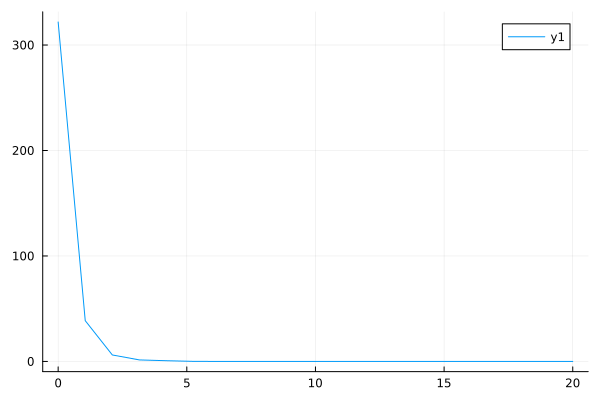

In [13]:
averageforit = zeros(20)
@polyvar x y
function simplify_polynomial(p, num)
    for i in 1:num
        alpha, beta = just_minimisebis(p)
        #to avoid an error
        if alpha == false
            return p,false
        end
        p = p - (alpha*beta)
    end
    return p,true
end

stop = 0 #needed more than 20 loops to reach acceptable error or just is stuck

for _ in 1:5
    print("+")
    p = get_random_polynomial(1000)
    for i in 1:20
        r,b = simplify_polynomial(p, i)
        if b == false
            stop += 1
            break
        end
        averageforit[i] = averageforit[i] + get_norm(r)
    end
end
averageforit = averageforit/5
print("Stopped: ", stop)
x = range(0,20,length=20)
plot(x,averageforit)
#norm vs number of iterations
#again at 5(even before) it starts to get very small

#### Plots the number of iterations needed to get to a certain tolerance
number of polynomials(y) vs how many iterations(x) <br>
This shows that the function can attain a certain tolerance
- stop : number of times the loop had to stop either because it could not find an answer or it needed more than 30 iterations to do so

++++++++++++++++++++Stopped: 1

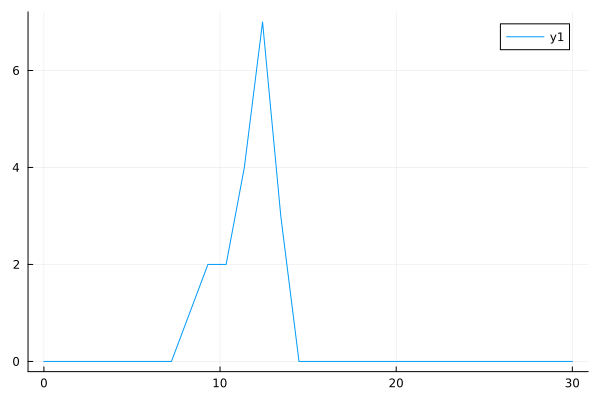

In [14]:
using Plots
@polyvar x y
tolerance = 1e-6
homotopy = zeros(30)
stop = 0
for _ in 1:20
    print("+")
    iterations = 1
    yes = true
    polnorm = 1
    p = get_random_polynomial(100)
    while polnorm > tolerance
        a,b=just_minimisebis(p)
        #if it cant get lower than tolerance then it fails
        if a == false
            stop += 1
            yes = false
            break
        end
        p = p - (a*b)
        iterations += 1
        #if it needs to do more than 30 iterations then it fails or just needs more
        if iterations == 30
            stop += 1
            yes = false
            break
        end
        polnorm = get_norm(p)
    end
    if yes
        homotopy[iterations] += 1
    end
end
print("Stopped: ", stop)
x = range(0,30,length=30)
plot(x, homotopy)
#From this we can see that the algorithm is consistent
#as it does not need more than 15 loops to be at tolerance (1e-6)